# **TRANSFORMER**


In [23]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [24]:
data = pd.read_csv("../files/train.csv", usecols=["Age", "Fare", "Survived"])

In [25]:
data["Age"].fillna(data["Age"].mean(), inplace=True)

C:\Users\AMRIT\AppData\Local\Temp\ipykernel_7160\493785903.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].mean(), inplace=True)


In [26]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:, 1:3],
    data.iloc[:, 0],
    test_size=0.2,
    random_state=5,
)

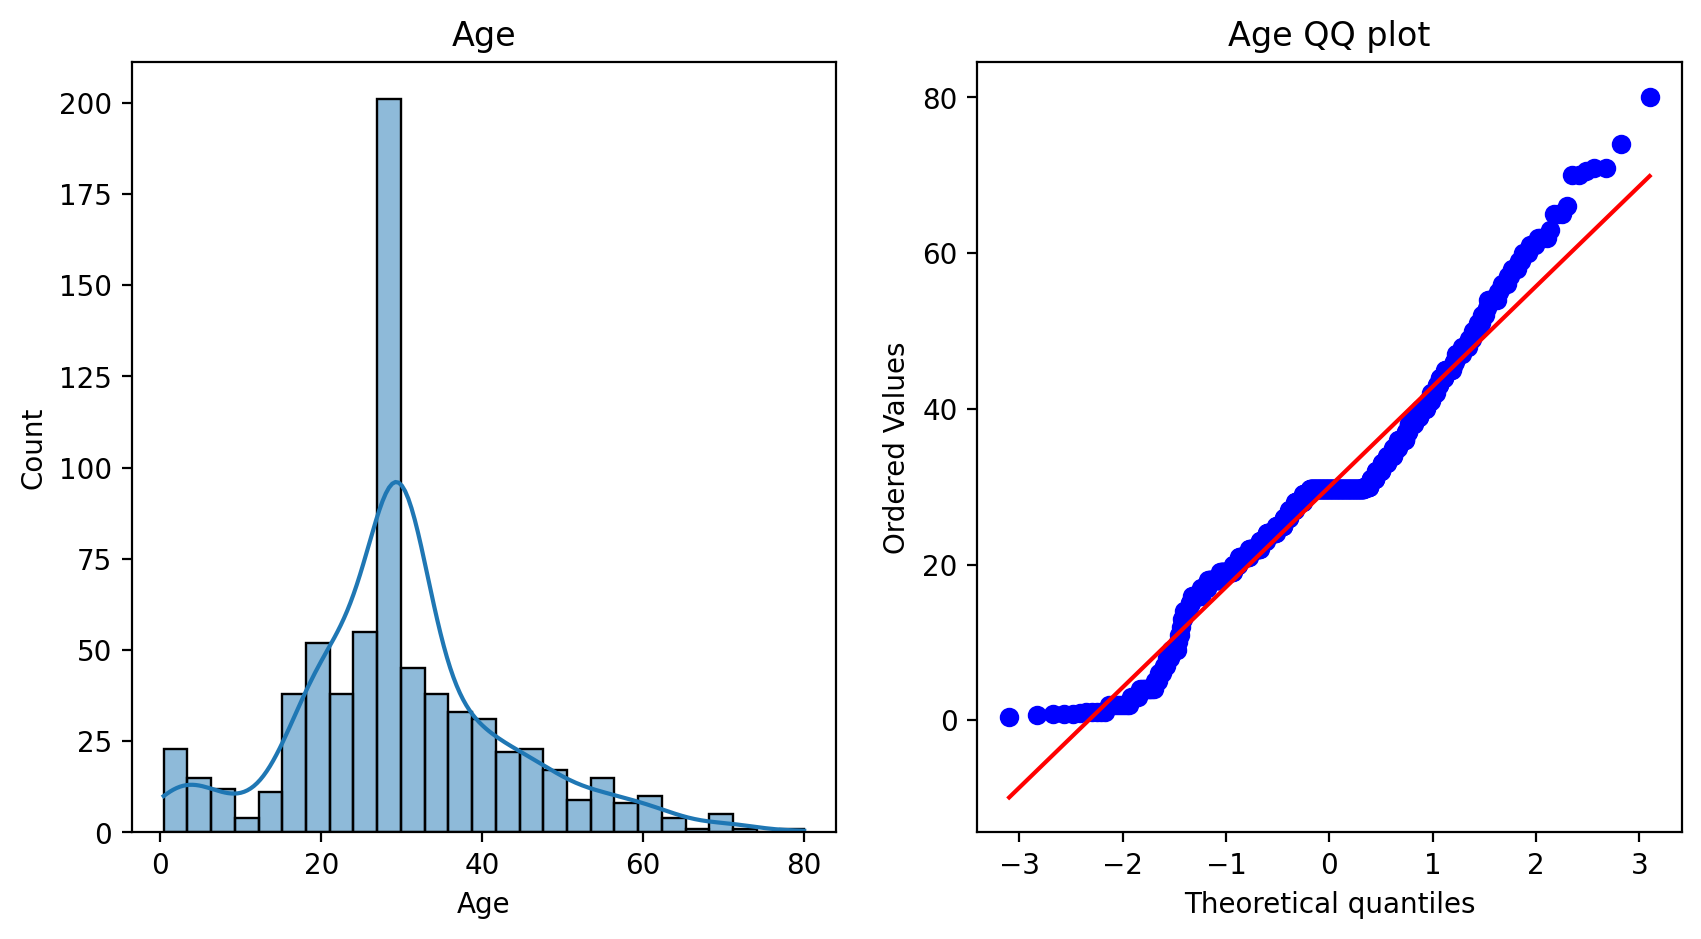

In [29]:
plt.figure(figsize=(10, 5), dpi=200)

plt.subplot(121)
sns.histplot(X_train["Age"], kde=True)
plt.title("Age")

plt.subplot(122)
stats.probplot(X_train["Age"], plot=plt, dist="norm")
plt.title("Age QQ plot")

plt.show()

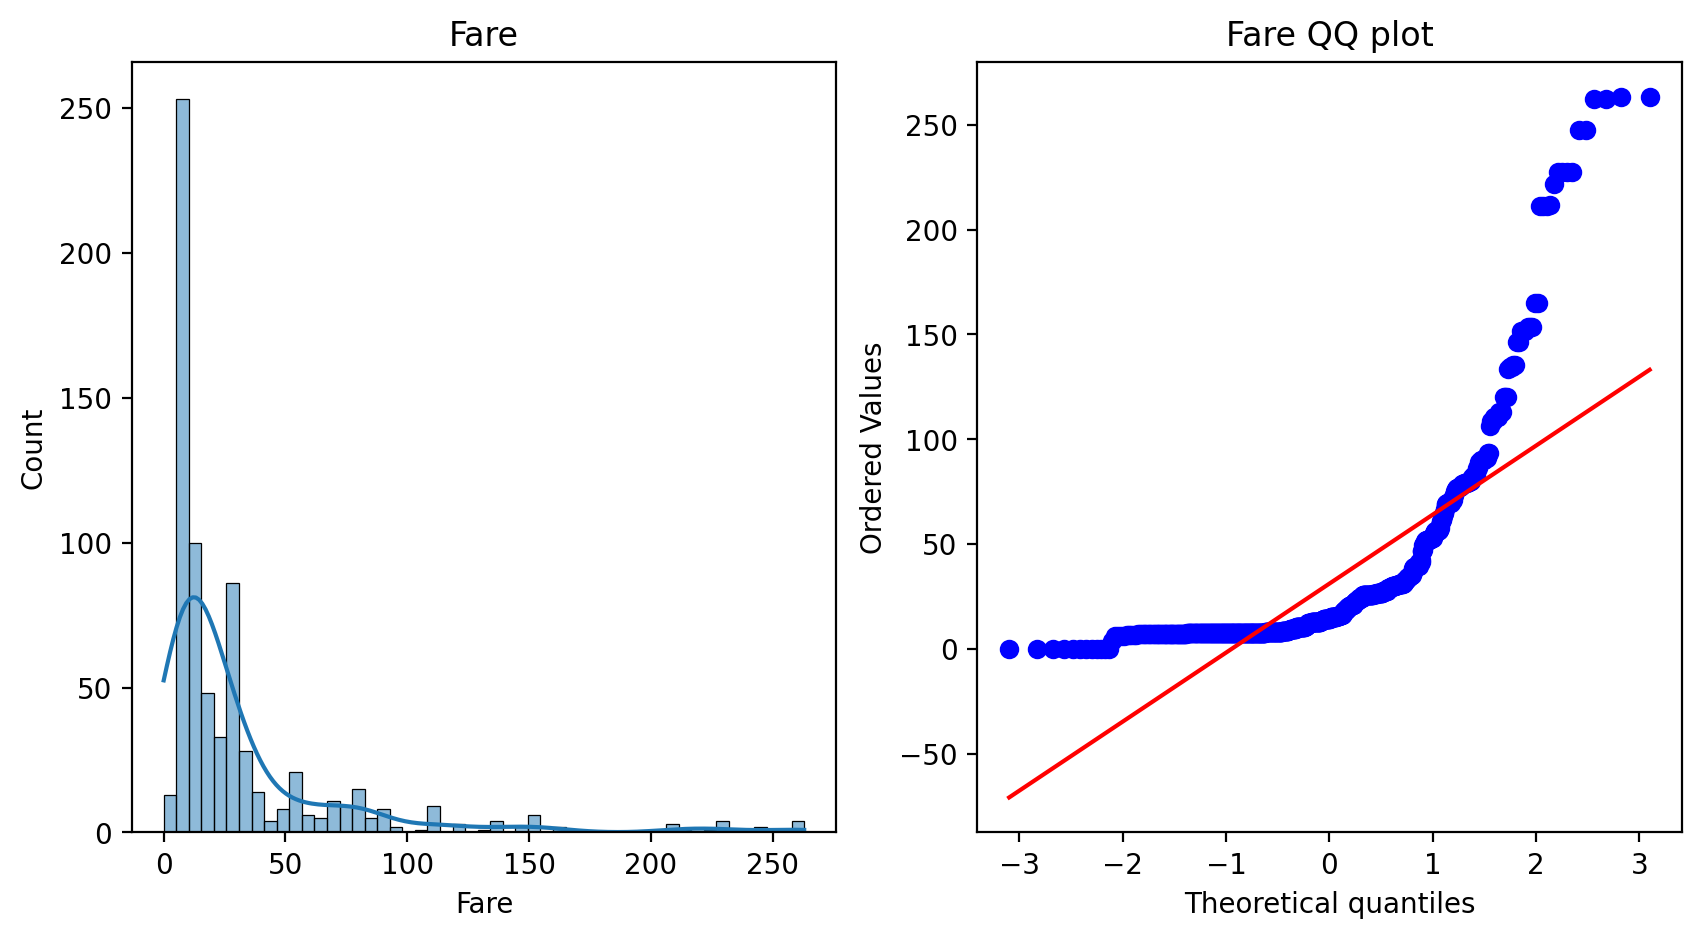

In [30]:
plt.figure(figsize=(10, 5), dpi=200)

plt.subplot(121)
sns.histplot(X_train["Fare"], kde=True)
plt.title("Fare")

plt.subplot(122)
stats.probplot(X_train["Fare"], plot=plt, dist="norm")
plt.title("Fare QQ plot")

plt.show()

# form the plot we can see that the fare is heavily right skewed

In [31]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()

In [32]:
lr.fit(X_train, y_train)
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred_lr = lr.predict(X_test)
y_pred_dtc = dtc.predict(X_test)

In [34]:
print(f"Accuracy Score of LR:{accuracy_score(y_test, y_pred=y_pred_lr)}")
print(f"Accuracy Score of dtc:{accuracy_score(y_test, y_pred=y_pred_dtc)}")

Accuracy Score of LR:0.6480446927374302
Accuracy Score of dtc:0.6815642458100558


_Using Function Transformer_


In [35]:
log_transformer = FunctionTransformer(func=np.log1p)
# log1p first adds the value 1 and takes the log of it

In [36]:
X_train_transformed = log_transformer.fit_transform(X_train)
X_test_transformed = log_transformer.transform(X_test)

In [37]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()

In [38]:
lr.fit(X_train_transformed, y_train)
dtc.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [39]:
y_pred_lr = lr.predict(X_test_transformed)
y_pred_dtc = dtc.predict(X_test_transformed)

In [40]:
print(f"Accuracy Score of LR:{accuracy_score(y_test, y_pred=y_pred_lr)}")
print(f"Accuracy Score of dtc:{accuracy_score(y_test, y_pred=y_pred_dtc)}")

Accuracy Score of LR:0.6983240223463687
Accuracy Score of dtc:0.6927374301675978


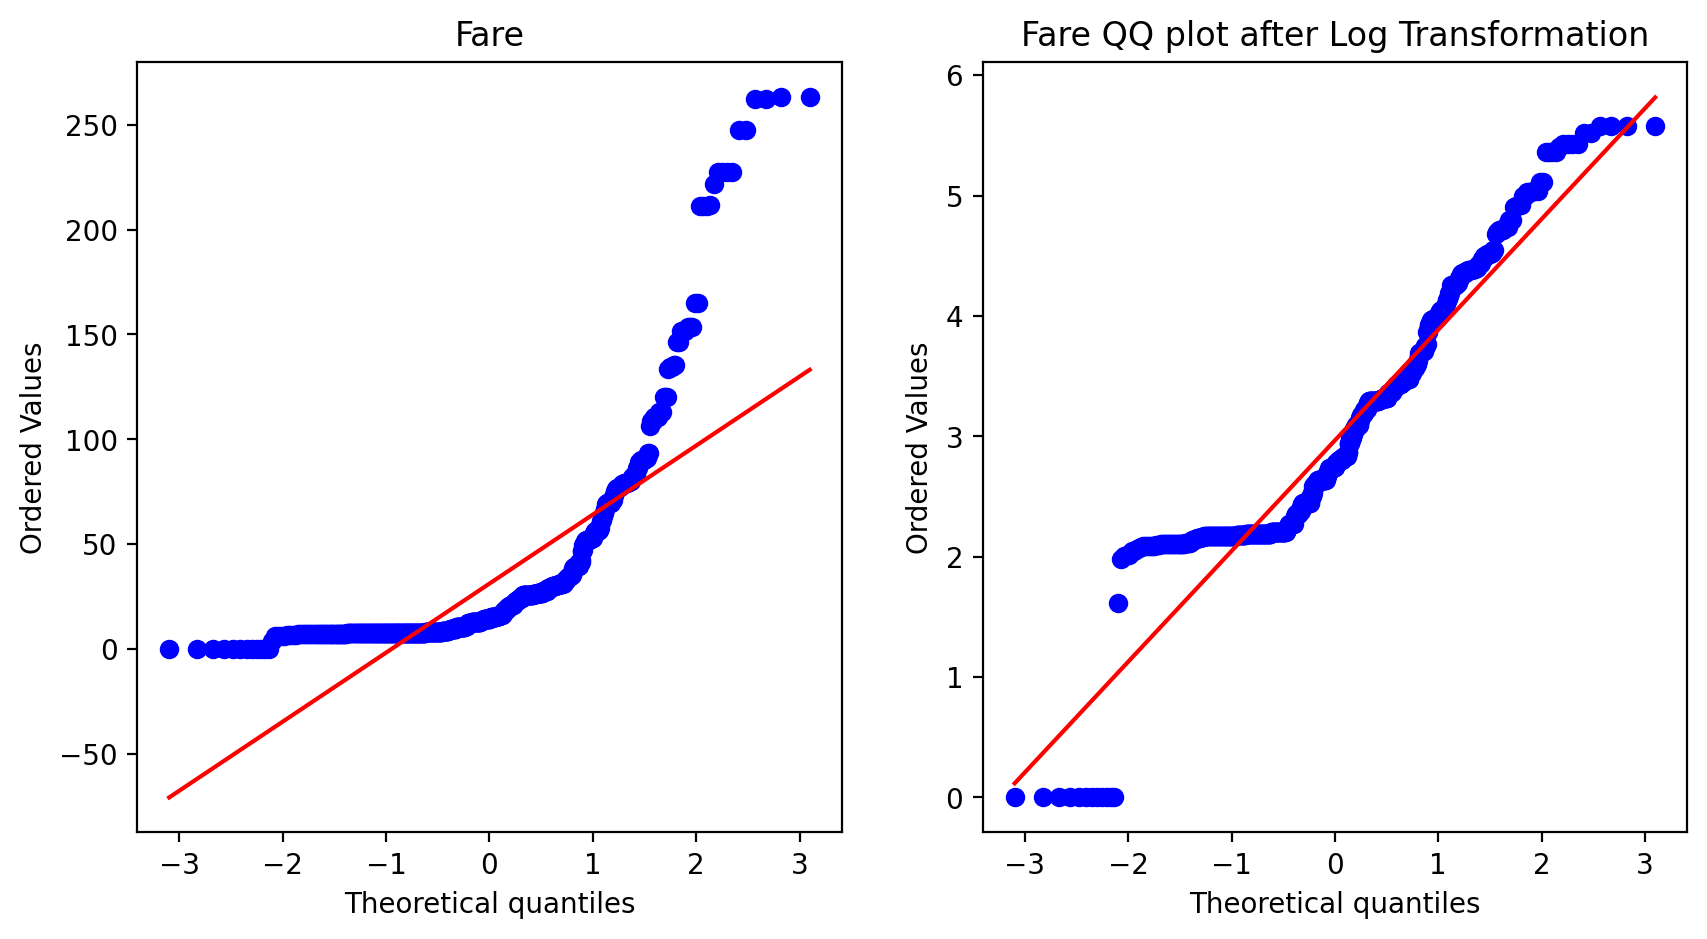

In [41]:
plt.figure(figsize=(10, 5), dpi=200)

plt.subplot(121)
stats.probplot(X_train["Fare"], plot=plt, dist="norm")
plt.title("Fare")

plt.subplot(122)
stats.probplot(X_train_transformed["Fare"], plot=plt, dist="norm")
plt.title("Fare QQ plot after Log Transformation")

plt.show()

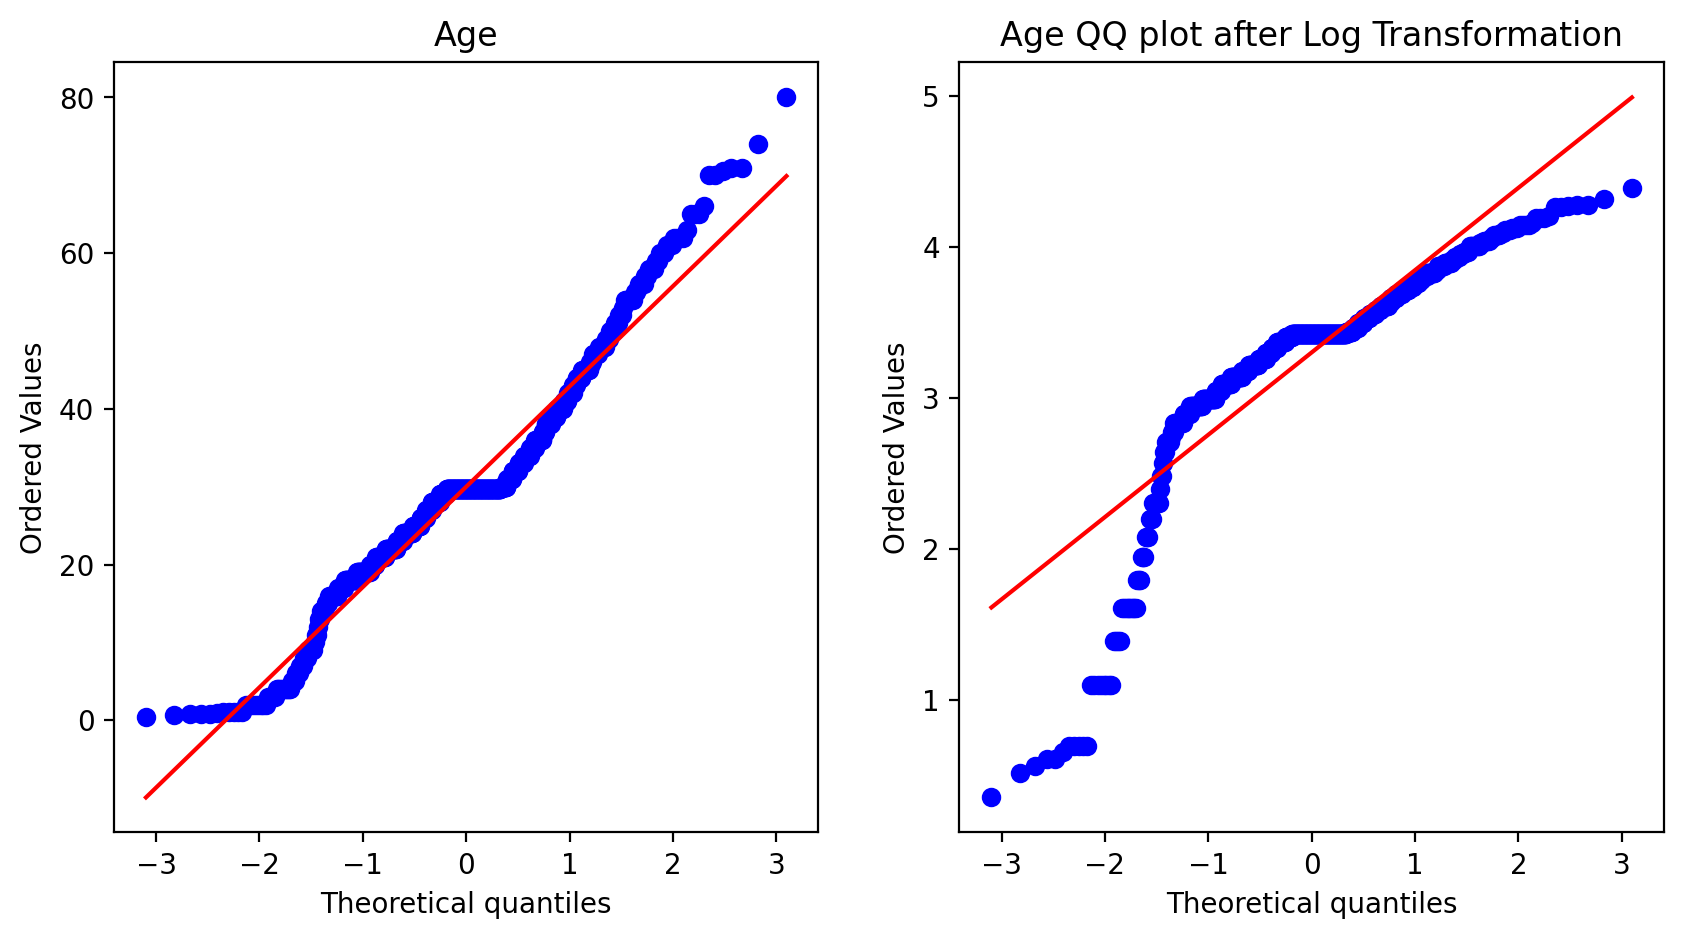

In [42]:
plt.figure(figsize=(10, 5), dpi=200)

plt.subplot(121)
stats.probplot(X_train["Age"], plot=plt, dist="norm")
plt.title("Age")

plt.subplot(122)
stats.probplot(X_train_transformed["Age"], plot=plt, dist="norm")
plt.title("Age QQ plot after Log Transformation")

plt.show()

_In above case, we can see that Age was normaly distributed before we applied Log transformation_


**Applying Log Transformation only on Fare**


In [43]:
column_transformer = ColumnTransformer(
    [
        ("log", FunctionTransformer(np.log1p), ["Fare"]),
    ],
    remainder="passthrough",
)

In [44]:
X_train_transformed_2 = column_transformer.fit_transform(X_train)
X_test_transformed_2 = column_transformer.transform(X_test)

In [45]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()

In [46]:
lr.fit(X_train_transformed_2, y_train)
dtc.fit(X_train_transformed_2, y_train)

DecisionTreeClassifier()

In [47]:
y_pred_lr = lr.predict(X_test_transformed_2)
y_pred_dtc = dtc.predict(X_test_transformed_2)

In [48]:
print(f"Accuracy Score of LR:{accuracy_score(y_test, y_pred=y_pred_lr)}")
print(f"Accuracy Score of dtc:{accuracy_score(y_test, y_pred=y_pred_dtc)}")

Accuracy Score of LR:0.6927374301675978
Accuracy Score of dtc:0.6815642458100558
